In [21]:
import numpy as np
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
import scipy


In [14]:
n = 24.0
p = 10

temperatures = np.array([75.0, 77.0, 76.0, 73.0, 69.0, 68.0, 63.0, 59.0,
57.0, 55.0, 54.0, 52.0, 50.0, 50.0, 49.0, 49.0,
49.0, 50.0, 54.0, 56.0, 59.0, 63.0, 67.0, 72.0 ])
ts = np.arange(0,n)+1
hours = np.copy(ts)

f = np.copy(temperatures).T

X = []
for i in range(p+1):
    X.append(hours**i)
X = np.array(X).T


In [15]:
#least square
alpha_Ls = np.linalg.pinv(X) @ f
f_Ls = X @ alpha_Ls

#LASSO
lasso_mod = linear_model.Lasso(alpha=1.0)
lasso_mod.fit(X,f)
alpha_lasso = lasso_mod.coef_
f_lasso = X @ alpha_lasso

#ridge regression
ridge_mod = linear_model.Ridge(alpha=1.0)
ridge_mod.fit(X,f)
alpha_ridge = ridge_mod.coef_
f_ridge = X @ alpha_ridge

#ElasticNet
enet_mod = linear_model.ElasticNet(alpha=1.0,random_state=0)
enet_mod.fit(X,f)
alpha_eNet= enet_mod.coef_
f_eNet = X @ alpha_eNet


e1 = np.linalg.norm(f-f_Ls,ord=2)/np.linalg.norm(f,ord=2)
e2 = np.linalg.norm(f-f_lasso,ord=2)/np.linalg.norm(f,ord=2)
e3 = np.linalg.norm(f-f_ridge,ord=2)/np.linalg.norm(f,ord=2)
e4 = np.linalg.norm(f-f_eNet,ord=2)/np.linalg.norm(f,ord=2)

print(e1)
print(e2)
print(e3)
print(e4)

0.008715082565358943
1.24588263479605
1.2323856806957552
1.2551906108391842


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.606e+01, tolerance: 2.145e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.325e+01, tolerance: 2.145e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


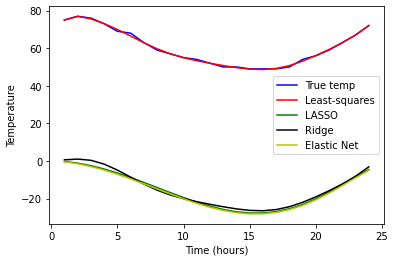

In [16]:
fig = plt.figure()
plt.plot(hours, f, color='b',label='True temp')
plt.plot(hours, f_Ls, color='r',label='Least-squares')
plt.plot(hours, f_lasso, color='g',label='LASSO')
plt.plot(hours, f_ridge, color='k',label='Ridge')
plt.plot(hours, f_eNet, color='y',label='Elastic Net')
plt.ylabel('Temperature')
plt.xlabel('Time (hours)')
plt.legend()
plt.show()

Here least-squares model seems to be the best fit of the temperature data

In [18]:
#corrupted random temperature

C_temp = np.array([75.0, 0.0, 76.0, 73.0, 69.0, 68.0, 63.0, 59.0,
57.0, 55.0, 54.0, 52.0, 50.0, 50.0, 49.0, 49.0,
49.0, 50.0, 54.0, 56.0, 59.0, 63.0, 67.0, 72.0 ])   #second temperature reading corrupted as 0.0
Ct = np.arange(0,n)+1
Chours = np.copy(Ct)

fc = np.copy(C_temp).T

Xc = []
for i in range(p+1):
    Xc.append(Chours**i)
Xc = np.array(Xc).T

In [19]:
# error with the corrupted data

#least square
alpha_Lsc = np.linalg.pinv(Xc) @ fc
f_Lsc = Xc @ alpha_Lsc

#LASSO
lasso_modc = linear_model.Lasso(alpha=1.0)
lasso_modc.fit(Xc,fc)
alpha_lassoc = lasso_modc.coef_
f_lassoc = Xc @ alpha_lassoc

#ridge regression
ridge_modc = linear_model.Ridge(alpha=1.0)
ridge_modc.fit(Xc,fc)
alpha_ridgec = ridge_modc.coef_
f_ridgec = Xc @ alpha_ridgec

#ElasticNet
enet_modc = linear_model.ElasticNet(alpha=1.0,random_state=0)
enet_modc.fit(Xc,fc)
alpha_eNetc= enet_modc.coef_
f_eNetc = Xc @ alpha_eNetc


Ce1 = np.linalg.norm(fc-f_Lsc,ord=2)/np.linalg.norm(fc,ord=2)
Ce2 = np.linalg.norm(fc-f_lassoc,ord=2)/np.linalg.norm(fc,ord=2)
Ce3 = np.linalg.norm(fc-f_ridgec,ord=2)/np.linalg.norm(fc,ord=2)
Ce4 = np.linalg.norm(fc-f_eNetc,ord=2)/np.linalg.norm(fc,ord=2)

print(Ce1)
print(Ce2)
print(Ce3)
print(Ce4)

0.18925328473558461
0.9225426006330952
0.9981341865926148
0.9642709337026009


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.219e+03, tolerance: 5.247e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.215e+03, tolerance: 5.247e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


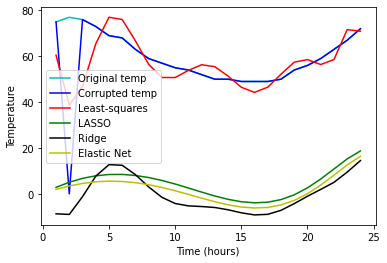

In [20]:
fig = plt.figure()
plt.plot(hours, f, color='c',label='Original temp')
plt.plot(hours, fc, color='b',label='Corrupted temp')
plt.plot(hours, f_Lsc, color='r',label='Least-squares')
plt.plot(hours, f_lassoc, color='g',label='LASSO')
plt.plot(hours, f_ridgec, color='k',label='Ridge')
plt.plot(hours, f_eNetc, color='y',label='Elastic Net')
plt.ylabel('Temperature')
plt.xlabel('Time (hours)')
plt.legend()
plt.show()

Here LASSO and Elastic Net seems to be most robust to the outlier where as least squares is the least robust to outlier. Ridge model cannot fit to the data initially after the outlier but catches up to the rest of the data afterwards.